In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
crime=pd.read_csv('E:DATA SETS/crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


EDA 


In [4]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
crime=crime.drop(['Unnamed: 0'],axis=1)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [7]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in crime.columns:
    print('{} : {}'.format(col,crime[col].unique()))

Murder : [13.2 10.   8.1  8.8  9.   7.9  3.3  5.9 15.4 17.4  5.3  2.6 10.4  7.2
  2.2  6.   9.7  2.1 11.3  4.4 12.1  2.7 16.1  4.3 12.2  7.4 11.4 11.1
 13.   0.8  7.3  6.6  4.9  6.3  3.4 14.4  3.8 12.7  3.2  8.5  4.   5.7
  6.8]
Assault : [236 263 294 190 276 204 110 238 335 211  46 120 249 113  56 115 109  83
 300 149 255  72 259 178 102 252  57 159 285 254 337  45 151 106 174 279
  86 188 201  48 156 145  81  53 161]
UrbanPop : [58 48 80 50 91 78 77 72 60 83 54 65 57 66 52 51 67 85 74 44 70 53 62 81
 56 89 86 45 75 68 87 59 32 63 73 39]
Rape : [21.2 44.5 31.  19.5 40.6 38.7 11.1 15.8 31.9 25.8 20.2 14.2 24.  21.
 11.3 18.  16.3 22.2  7.8 27.8 35.1 14.9 17.1 28.2 16.4 16.5 46.   9.5
 18.8 32.1 26.1 16.1  7.3 21.4 20.  29.3  8.3 22.5 12.8 26.9 25.5 22.9
 11.2 20.7 26.2  9.3 10.8 15.6]


There are no symbol present.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

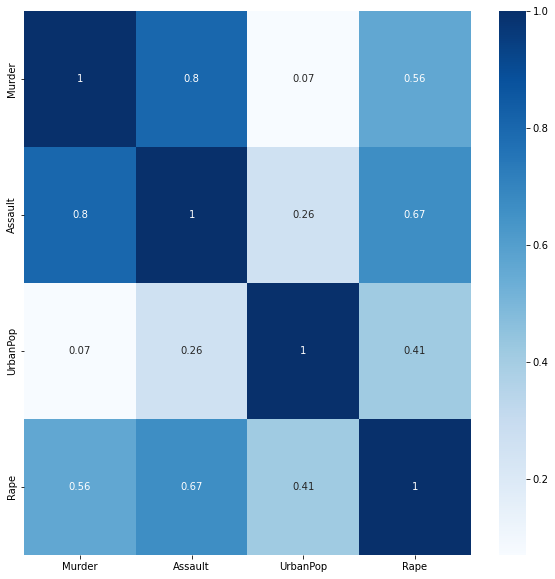

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(crime.corr(),cbar=True,annot=True,cmap='Blues')

In [10]:
# Normalize heterogenous numerical data using z-score (x-mean/std) or custom defined function 
# Normalization function - here custom defined
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [11]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime)
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


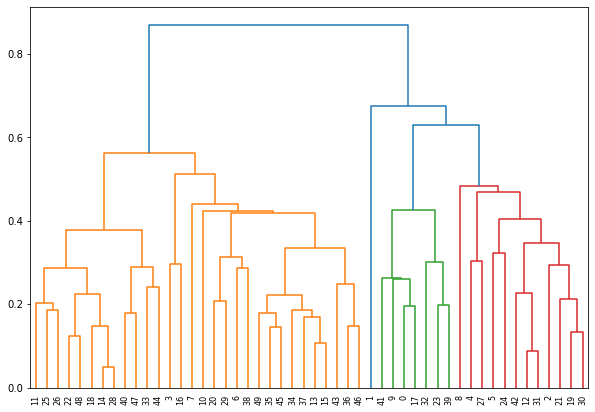

In [12]:
import scipy.cluster.hierarchy as sch
# graph size
plt.figure(figsize=(10, 7))  
#creating dendogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [13]:
from sklearn.cluster import AgglomerativeClustering
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [14]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [15]:
Clusters

,Clusters
0,0
1,0
2,3
3,1
4,3
5,3
6,1
7,1
8,3
9,0


In [16]:
# Adding clusters to dataset
crime['Clusters']=hc.labels_
crime

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,0


In [17]:
from sklearn.cluster import KMeans

In [18]:
model=KMeans(n_clusters=5) 
model.fit(df_norm)

KMeans(n_clusters=5)

In [19]:
# getting the labels of clusters assigned to each row 
model.labels_

array([4, 1, 1, 0, 1, 1, 3, 3, 1, 4, 3, 2, 1, 0, 2, 0, 0, 4, 2, 1, 3, 1,
       2, 4, 0, 0, 0, 1, 2, 3, 1, 1, 4, 2, 0, 0, 0, 0, 3, 4, 2, 4, 1, 3,
       2, 0, 0, 2, 2, 0])

In [20]:
# Assign clusters to the data set
crime2=crime.copy()
crime2['cluster_id']=model.labels_
crime2

,Murder,Assault,UrbanPop,Rape,Clusters,cluster_id
0,13.2,236,58,21.2,0,4
1,10.0,263,48,44.5,0,1
2,8.1,294,80,31.0,3,1
3,8.8,190,50,19.5,1,0
4,9.0,276,91,40.6,3,1
5,7.9,204,78,38.7,3,1
6,3.3,110,77,11.1,1,3
7,5.9,238,72,15.8,1,3
8,15.4,335,80,31.9,3,1
9,17.4,211,60,25.8,0,4


In [21]:
#Import the libraries
from sklearn.cluster import DBSCAN

In [22]:
array=crime.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   0. ],
       [ 10. , 263. ,  48. ,  44.5,   0. ],
       [  8.1, 294. ,  80. ,  31. ,   3. ],
       [  8.8, 190. ,  50. ,  19.5,   1. ],
       [  9. , 276. ,  91. ,  40.6,   3. ],
       [  7.9, 204. ,  78. ,  38.7,   3. ],
       [  3.3, 110. ,  77. ,  11.1,   1. ],
       [  5.9, 238. ,  72. ,  15.8,   1. ],
       [ 15.4, 335. ,  80. ,  31.9,   3. ],
       [ 17.4, 211. ,  60. ,  25.8,   0. ],
       [  5.3,  46. ,  83. ,  20.2,   1. ],
       [  2.6, 120. ,  54. ,  14.2,   2. ],
       [ 10.4, 249. ,  83. ,  24. ,   3. ],
       [  7.2, 113. ,  65. ,  21. ,   1. ],
       [  2.2,  56. ,  57. ,  11.3,   2. ],
       [  6. , 115. ,  66. ,  18. ,   1. ],
       [  9.7, 109. ,  52. ,  16.3,   1. ],
       [ 15.4, 249. ,  66. ,  22.2,   0. ],
       [  2.1,  83. ,  51. ,   7.8,   2. ],
       [ 11.3, 300. ,  67. ,  27.8,   3. ],
       [  4.4, 149. ,  85. ,  16.3,   1. ],
       [ 12.1, 255. ,  74. ,  35.1,   3. ],
       [  2.7,  72. ,  66. ,  14

In [23]:
from sklearn.preprocessing import StandardScaler
#standardizing
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [24]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -1.48365074],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.48365074],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  1.4446073 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.50756473],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  1.4446073 ],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  1.4446073 ],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.50756473],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.50756473],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  1.4446073 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -1.48365074],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -0.50756473],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  0.46852129],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  1.4446073 ],
       [-0.13637203, -0.70012057, -0.0

In [25]:
model = DBSCAN(eps=2, min_samples=5)
model.fit(X)

DBSCAN(eps=2)

In [26]:
#Noisy samples are given the label -1.
model.labels_

array([ 0, -1,  1,  0,  1,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  1,  0,  1,  0,  0,  1,  0,  0,  1,  0,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [27]:
cl=pd.DataFrame(model.labels_,columns=['cluster'])
cl

,cluster
0,0
1,-1
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,0


In [28]:
pd.concat([crime,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,Clusters,cluster
0,13.2,236,58,21.2,0,0
1,10.0,263,48,44.5,0,-1
2,8.1,294,80,31.0,3,1
3,8.8,190,50,19.5,1,0
4,9.0,276,91,40.6,3,1
5,7.9,204,78,38.7,3,1
6,3.3,110,77,11.1,1,0
7,5.9,238,72,15.8,1,0
8,15.4,335,80,31.9,3,1
9,17.4,211,60,25.8,0,0
